# Reminder: concetti di statistica

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from mymodule import *

In [3]:
def func(x, a, b):
    return a+b*x

## Pseudo esperimenti

In python simulare i risultati di un esperimento a partire da un modello e testare concetti di statistica.

Ad esempio supponiamo che esista una relazione lineare tra x e y del tipo y = A + B*x

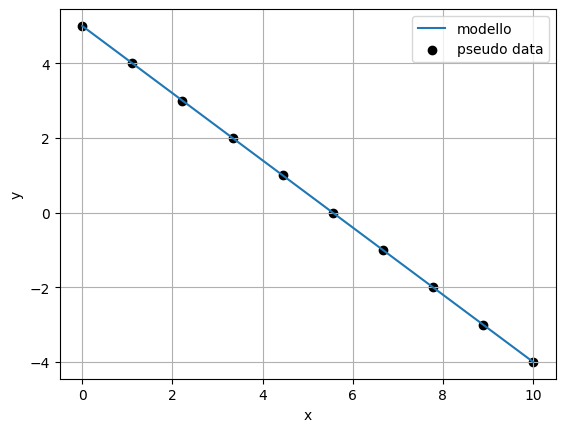

In [4]:
npoints = 10

x = np.linspace(0, 10, npoints)
A = 5
B = -.9
y = func(x, A, B)

plt.plot(x, func(x, A, B) , label='modello')
plt.scatter(x, y, color='black', label='pseudo data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

Possiamo includere nel modello anche l'effetto di una incertezza sperimentale sulla misura.

Per farlo possiamo utilizzare la funzione `random.normal` di `numpy`, che ci permette di estrarre numeri casuali secondo una distribuzione gaussiana

a = 4.789857963489656+/-0.29387690682262935
b = -0.8866274993433796+/-0.049543369430686234
cov(a,b) = -0.012272727272727275
chi/ndof= 9.747021464387695/8 = 1.2183776830484618


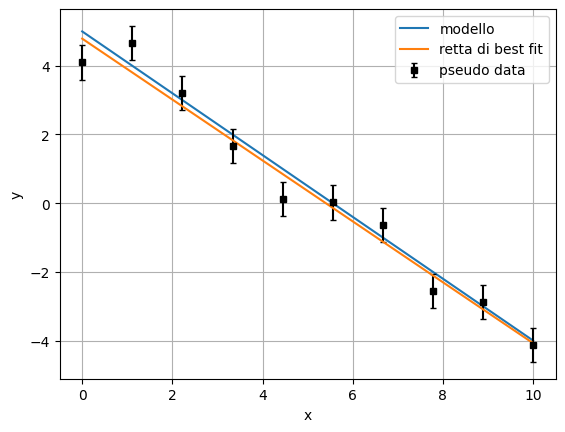

In [5]:
sigma = .5 #errore sulla misura
W = np.ones_like(x)/sigma**2 #array di pesi
noise = np.random.normal(0,sigma,npoints) # 'rumore' introdotto nella misura. Modellizzato secondo una gaussiana di media 0 e larghezza = sigma.
y = func(x, A, B) + noise
a_f, b_f, sigma_a_f, sigma_b_f, cov_ab_f, chi2_f = fit_lineare_pesato(x, y, W)

plt.plot(x, func(x, A, B) , label='modello')
plt.errorbar(x, y, yerr = sigma, fmt='s', markersize=4., capsize=2, color='black', label='pseudo data')
plt.plot(x, func(x, a_f, b_f) , label = 'retta di best fit')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

Che significato possiamo attribuire agli errori su a e b, la covarianza cov(a,b) e il chi quadro?



La cosa interessante è che possiamo ripetere questo pseudo esperimento un numero esorbitante di volte, e in questo modo  studiare le propietà delle distribuzioni dei risultati del fit lineare.

In [6]:
CHI2 = []
AF = []
BF = []
SAF = []
SBF = []
COV = []

nsim = 10000
for i in range(nsim):
    sigma = 0.5
    W = np.ones_like(x)/sigma**2
    noise = np.random.normal(0,sigma,npoints)
    y = func(x, A, B) + noise
    a_f, b_f, sigma_a_f, sigma_b_f, cov_ab_f, chi2_f = fit_lineare_pesato(x, y, W, verbose=False)

    CHI2 += [chi2_f]
    AF += [a_f]
    BF += [b_f]
    SAF += [sigma_a_f]
    SBF += [sigma_b_f]
    COV += [cov_ab_f]

CHI2 = np.array(CHI2)
AF = np.array(AF)
BF = np.array(BF)
SAF = np.array(SAF)
SBF = np.array(SBF)
COV = np.array(COV)

### distribuzione del chi quadro

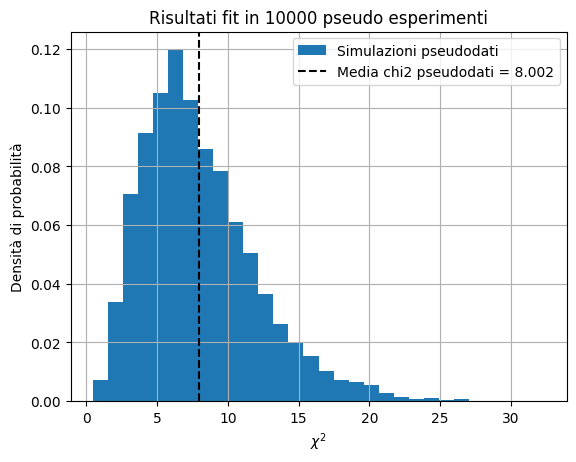

In [7]:
mean_C = np.mean(CHI2)

plt.hist(CHI2, bins=30, density=True, label="Simulazioni pseudodati")
plt.axvline(mean_C, color='black', linestyle='--', label=f'Media chi2 pseudodati = {mean_C:.3f}')

plt.xlabel('$\chi^2$')
plt.ylabel('Densità di probabilità')
plt.title(f"Risultati fit in {nsim} pseudo esperimenti")
plt.legend()
plt.grid(True)
plt.show()


Ricordiamo che il numero di gradi di liberta è dato dal numero di punti sperimentali meno il numero di parametri estratto dal fit. 

Nel nostro caso: 10 - 2 = 8 

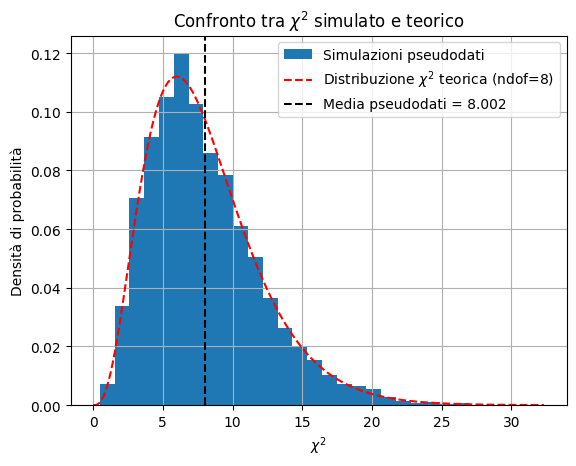

In [8]:
from scipy.stats import chi2
mean_C = np.mean(CHI2)

plt.hist(CHI2, bins=30, density=True, label="Simulazioni pseudodati")
ndof = npoints - 2
xplot = np.linspace(0, np.max(CHI2), nsim) 
chi2_pdf = chi2.pdf(xplot, ndof)

plt.plot(xplot, chi2_pdf, 'r--', label=f'Distribuzione $\\chi^2$ teorica (ndof={ndof})')
plt.axvline(mean_C, color='black', linestyle='--', label=f'Media pseudodati = {mean_C:.3f}')

# Etichette e legenda
plt.xlabel('$\chi^2$')
plt.ylabel('Densità di probabilità')
plt.title("Confronto tra $\chi^2$ simulato e teorico")
plt.legend()
plt.grid(True)
plt.show()


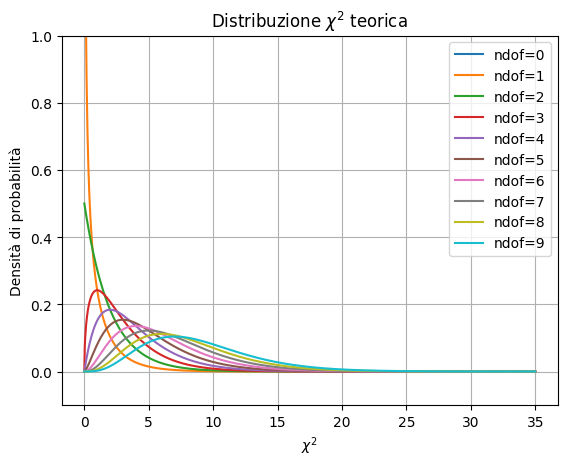

In [9]:
from scipy.stats import chi2

xplot = np.linspace(0, 35, 1000) 

for ndof in range(10):
    chi2_pdf = chi2.pdf(xplot, ndof)
    plt.plot(xplot, chi2_pdf, label=f'ndof={ndof}')

# Etichette e legenda
plt.xlabel('$\chi^2$')
plt.ylabel('Densità di probabilità')
plt.title("Distribuzione $\\chi^2$ teorica")
plt.legend()
plt.grid(True)
plt.ylim(-0.1, 1)
plt.show()


### distribuzione degli errori sui parametri a e b

Richiamiamo il risultato di un fit

In [10]:
a_f, b_f, sigma_a_f, sigma_b_f, cov_ab_f, chi2_f = fit_lineare_pesato(x, y, W)


a = 5.74776604288314+/-0.29387690682262935
b = -0.9806464376834041+/-0.049543369430686234
cov(a,b) = -0.012272727272727275
chi/ndof= 9.868409368303022/8 = 1.2335511710378777


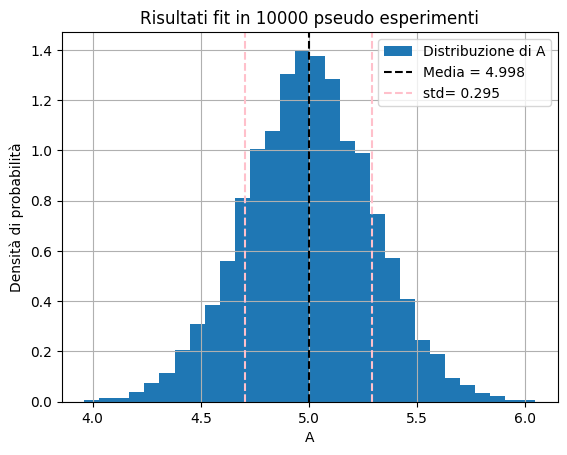

In [11]:
mean_A = np.mean(AF)
std_A = np.std(AF)
plt.hist(AF, bins=30, density=True, label="Distribuzione di A")

plt.axvline(mean_A, color='black', linestyle='--', label=f'Media = {mean_A:.3f}')
plt.axvline(mean_A + std_A, color='pink', linestyle='--', label=f'std= {std_A:.3f}')
plt.axvline(mean_A - std_A, color='pink', linestyle='--', )

plt.xlabel('A')
plt.ylabel('Densità di probabilità')
plt.title(f"Risultati fit in {nsim} pseudo esperimenti")
plt.legend()
plt.grid(True)
plt.show()


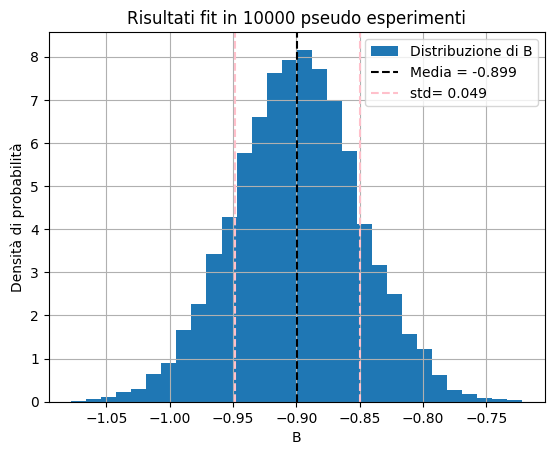

In [12]:
mean_B = np.mean(BF)
std_B = np.std(BF)
plt.hist(BF, bins=30, density=True, label="Distribuzione di B")

plt.axvline(mean_B, color='black', linestyle='--', label=f'Media = {mean_B:.3f}')
plt.axvline(mean_B + std_B, color='pink', linestyle='--', label=f'std= {std_B:.3f}')
plt.axvline(mean_B - std_B, color='pink', linestyle='--', )

plt.xlabel('B')
plt.ylabel('Densità di probabilità')
plt.title(f"Risultati fit in {nsim} pseudo esperimenti")
plt.legend()
plt.grid(True)
plt.show()


Reminder: La covarianza di due variabili statistiche o variabili aleatorie è un valore numerico che fornisce una misura di quanto le due varino assieme (wikipedia)

Il fit ci dice che tra a e b sussiste una covarianza negativa. Possiamo effettivamente osservare come si comporatano a e b in una popolazione di molti pseudo esperimenti

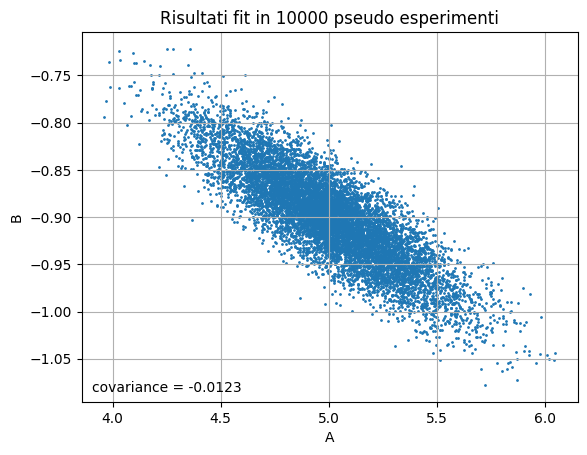

In [13]:
cov = 0
meanA = np.mean(AF)
meanB = np.mean(BF)
for i in range(len(AF)):
    cov += (AF[i]-meanA)*(BF[i]-meanB)
cov = cov/(len(AF)-1)

plt.scatter(AF, BF, s=1)
plt.xlabel('A')
plt.ylabel('B')
plt.title(f"Risultati fit in {nsim} pseudo esperimenti")
plt.annotate(f'covariance = {cov:.4f}',
        xy=(0.02, 0.02), xycoords='axes fraction',
        ha='left', va='bottom', fontsize=10)
plt.grid(True)
plt.show()

### esempio pratico: stima del punto di attraversamento dello 0 per una retta 

In [14]:
print(f'punto di attraversamento zero atteso: -A/B = {-A/B}')

punto di attraversamento zero atteso: -A/B = 5.555555555555555


Anche qui possiamo utilizzare i risultati dei pseudo esperimenti per valutare come si distribuisce la stima di -A/B

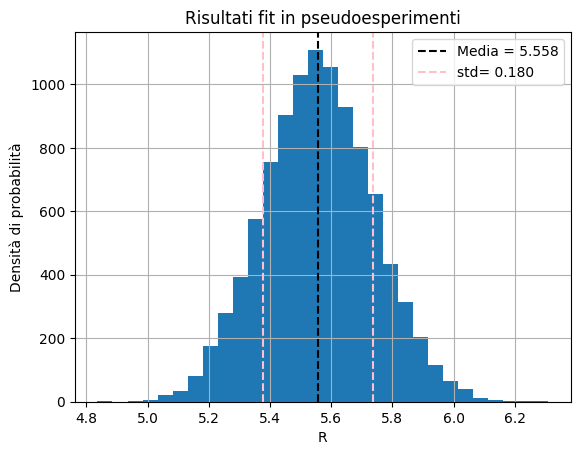

In [15]:
R = -AF/BF # punto di attraversamento dello zero: 0 = A + B*x

plt.hist(R, bins=30)
mean_R = np.mean(R)
std_R = np.std(R)
plt.axvline(mean_R, color='black', linestyle='--', label=f'Media = {mean_R:.3f}')
plt.axvline(mean_R + std_R, color='pink', linestyle='--', label=f'std= {std_R:.3f}')
plt.axvline(mean_R - std_R, color='pink', linestyle='--', )

plt.xlabel('R')
plt.ylabel('Densità di probabilità')
plt.title("Risultati fit in pseudoesperimenti")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
sigma_R = abs(R) * np.sqrt((SAF / AF)**2 + (SBF / BF)**2 - 2 * (COV / (AF * BF)))
print(f'Errore propagato su -A/B = {sigma_R.mean()}')

Errore propagato su -A/B = 0.17928732878718473


In [17]:
sigma_R_sbagliato = abs(R) * np.sqrt((SAF / AF)**2 + (SBF / BF)**2 )
print(f'Errore propagato male (senza il termine di covarianza!) su -A/B = {sigma_R_sbagliato.mean()}')

Errore propagato male (senza il termine di covarianza!) su -A/B = 0.4492463395132374
